In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

# Generate some data

### $y$<sub>t</sub> = 50 + 0.4ϵ<sub>t-1</sub> + 0.3ϵ<sub>t-2</sub> + ϵ<sub>t</sub>
### ϵ<sub>t</sub> ~ N(0,1)

In [2]:
errors = np.random.normal(0, 1, 200)

In [3]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [4]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [5]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))
series

2019-09-01    48.470199
2019-09-02    50.903140
2019-09-03    51.371857
2019-09-04    50.902172
2019-09-05    50.444148
                ...    
2019-12-28    49.958136
2019-12-29    50.365722
2019-12-30    51.238507
2019-12-31    52.092618
2020-01-01    50.662832
Freq: D, Length: 123, dtype: float64

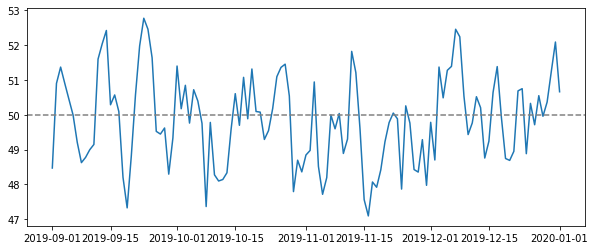

In [6]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

# ACF

<BarContainer object of 10 artists>

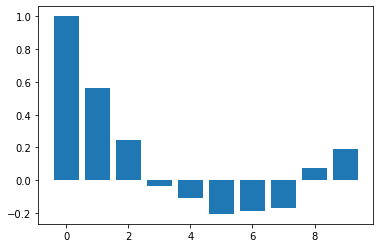

In [7]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

# PACF

<BarContainer object of 20 artists>

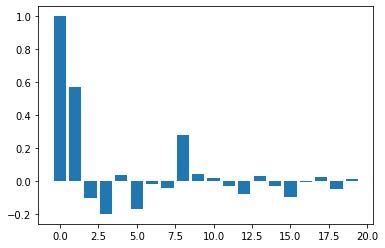

In [8]:
pacf_vals = pacf(series)
num_lags = 20
plt.bar(range(num_lags), pacf_vals[:num_lags])

# Get training and testing sets

In [9]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

# Fit MA model

In [19]:
# create the model
model = ARIMA(train_data, order=(3,0,2))

In [20]:
#fit the model
model_fit = model.fit()

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [21]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -172.505
Date:                Sun, 17 Nov 2024   AIC                            359.010
Time:                        13:54:05   BIC                            378.581
Sample:                    09-01-2019   HQIC                           366.958
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8086      0.148    337.407      0.000      49.519      50.098
ar.L1          0.3186      0.269      1.183      0.237      -0.209       0.847
ar.L2          0.5936      0.185      3.215      0.0

# Predicted model

In [22]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]


In [23]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [24]:
residuals = test_data - predictions

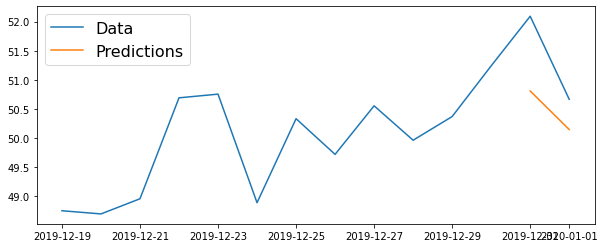

In [25]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [26]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0175


In [27]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.9813699228702052
